In [ ]:
# Logistic Regression - Theory and Implementation

# 1. What is Logistic Regression, and how does it differ from Linear Regression?
"""
Logistic Regression is a classification algorithm used to predict the probability of a categorical dependent variable.
Linear Regression predicts a continuous output, while Logistic Regression predicts discrete classes (usually binary).
"""

# 2. What is the mathematical equation of Logistic Regression?
"""
P(y=1|X) = 1 / (1 + exp(-(β0 + β1*X1 + β2*X2 + ... + βn*Xn)))
"""

# 3. Why do we use the Sigmoid function in Logistic Regression?
"""
The Sigmoid function maps the output of the linear equation to a probability range between 0 and 1.
"""

# 4. What is the cost function of Logistic Regression?
"""
Log Loss or Binary Cross Entropy:
Cost = -[y*log(p) + (1-y)*log(1-p)]
"""

# 5. What is Regularization in Logistic Regression? Why is it needed?
"""
Regularization adds a penalty term to the cost function to reduce overfitting and improve generalization.
"""

# 6. Explain the difference between Lasso, Ridge, and Elastic Net regression
"""
- Lasso (L1): Adds |coefficients| penalty. Can shrink some coefficients to zero (feature selection).
- Ridge (L2): Adds squared coefficients penalty. Shrinks coefficients but keeps all features.
- Elastic Net: Combination of L1 and L2 penalties.
"""

# 7. When should we use Elastic Net instead of Lasso or Ridge?
"""
Elastic Net is preferable when:
- There are multiple correlated features
- You want a balance between feature selection and coefficient shrinkage
"""

# 8. What is the impact of the regularization parameter (λ) in Logistic Regression?
"""
- Higher λ increases penalty, shrinking coefficients more.
- Very high λ can underfit, very low λ can overfit.
"""

# 9. What are the key assumptions of Logistic Regression?
"""
- Linear relationship between features and log-odds
- No multicollinearity
- Large sample size
- Independent observations
"""

# 10. What are some alternatives to Logistic Regression for classification tasks?
"""
- Decision Trees
- Random Forest
- Support Vector Machines (SVM)
- k-Nearest Neighbors (KNN)
- Naive Bayes
- Neural Networks
"""

# 11. What are Classification Evaluation Metrics?
"""
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC
- Confusion Matrix
"""

# 12. How does class imbalance affect Logistic Regression?
"""
- Logistic Regression may get biased toward the majority class
- Use techniques like class weights, SMOTE, or resampling
"""

# 13. What is Hyperparameter Tuning in Logistic Regression?
"""
- Tuning model parameters like regularization strength (C), solver, penalty type using GridSearchCV or RandomizedSearchCV
"""

# 14. What are different solvers in Logistic Regression? Which one should be used?
"""
- liblinear: good for small datasets (supports L1)
- newton-cg, lbfgs, sag, saga: good for large datasets
- saga: supports both L1 and L2 penalties
"""

# 15. How is Logistic Regression extended for multiclass classification?
"""
- One-vs-Rest (OvR)
- Multinomial (Softmax Regression)
"""

# 16. What are the advantages and disadvantages of Logistic Regression?
"""
Advantages:
- Simple and interpretable
- Fast training
Disadvantages:
- Assumes linearity in log-odds
- Not suitable for complex relationships
"""

# 17. What are some use cases of Logistic Regression?
"""
- Spam detection
- Disease prediction
- Customer churn prediction
- Credit scoring
"""

# 18. What is the difference between Softmax Regression and Logistic Regression?
"""
- Logistic Regression: Binary classification (sigmoid function)
- Softmax Regression: Multiclass classification (softmax function)
"""

# 19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
"""
- OvR: simpler, works well for most problems
- Softmax: better for inherently multiclass problems
"""

# 20. How do we interpret coefficients in Logistic Regression?
"""
- Coefficients indicate the change in log-odds for a unit change in the predictor
- exp(coefficient) gives the odds ratio
"""

# Sample Python Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [1]:
# Logistic Regression - practical Answers

# -------------------------------------------

# -------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# -------------------------------------------
# 1. Load dataset and apply Logistic Regression
# -------------------------------------------
print("\n1. Logistic Regression (Basic Binary Classification)")
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# -------------------------------------------
# 2. Apply L1 Regularization (Lasso)
# -------------------------------------------
print("\n2. Logistic Regression with L1 Regularization (Lasso)")
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_l1))

# -------------------------------------------
# 3. Apply L2 Regularization (Ridge)
# -------------------------------------------
print("\n3. Logistic Regression with L2 Regularization (Ridge)")
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Coefficients:", model_l2.coef_)

# -------------------------------------------
# 4. Apply Elastic Net Regularization
# -------------------------------------------
print("\n4. Logistic Regression with Elastic Net Regularization")
model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model_elastic.fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_elastic))

# -------------------------------------------
# 5. Multiclass Classification with OvR
# -------------------------------------------
print("\n5. Multiclass Classification with OvR")
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

model_multiclass = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
model_multiclass.fit(X_train_iris, y_train_iris)
y_pred_multiclass = model_multiclass.predict(X_test_iris)
print("Accuracy:", accuracy_score(y_test_iris, y_pred_multiclass))
print("Classification Report:\n", classification_report(y_test_iris, y_pred_multiclass))



1. Logistic Regression (Basic Binary Classification)
Accuracy: 0.956140350877193

2. Logistic Regression with L1 Regularization (Lasso)
Accuracy: 0.956140350877193

3. Logistic Regression with L2 Regularization (Ridge)
Accuracy: 0.956140350877193
Coefficients: [[ 2.05290697e+00  1.51533702e-01 -1.24804911e-01 -1.27939865e-03
  -1.33814009e-01 -4.02140659e-01 -6.21745830e-01 -3.23605525e-01
  -1.95961974e-01 -2.92582304e-02 -4.35554999e-02  1.42002841e+00
  -2.85857868e-01 -7.33086108e-02 -1.47665609e-02 -8.35046068e-03
  -4.87477481e-02 -3.57017118e-02 -3.98308949e-02  4.43088880e-03
   1.22034735e+00 -4.00030864e-01 -4.46739318e-02 -2.64628214e-02
  -2.46261793e-01 -1.18060554e+00 -1.55863240e+00 -5.81890914e-01
  -7.00020159e-01 -1.14670583e-01]]

4. Logistic Regression with Elastic Net Regularization
Accuracy: 0.9649122807017544

5. Multiclass Classification with OvR
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00

In [15]:
# -------------------------------------------
# 6. Hyperparameter Tuning using GridSearchCV
# -------------------------------------------
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
print("\n6. Hyperparameter Tuning using GridSearchCV")
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

# -------------------------------------------
# 7. Stratified K-Fold Cross-Validation
# -------------------------------------------
print("\n7. Stratified K-Fold Cross-Validation")
skf = StratifiedKFold(n_splits=5)
accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train_skf, X_test_skf = X[train_index], X[test_index]
    y_train_skf, y_test_skf = y[train_index], y[test_index]
    model_cv = LogisticRegression(max_iter=1000)
    model_cv.fit(X_train_skf, y_train_skf)
    y_pred_cv = model_cv.predict(X_test_skf)
    acc = accuracy_score(y_test_skf, y_pred_cv)
    accuracies.append(acc)

print("Cross-Validation Accuracies:", accuracies)
print("Average Accuracy:", np.mean(accuracies))

# -------------------------------------------
# 8. Load dataset from CSV and apply Logistic Regression
# -------------------------------------------
print("\n8. Load Dataset from CSV and Apply Logistic Regression")




6. Hyperparameter Tuning using GridSearchCV
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9604395604395606

7. Stratified K-Fold Cross-Validation
Cross-Validation Accuracies: [0.9298245614035088, 0.9385964912280702, 0.9736842105263158, 0.9473684210526315, 0.9646017699115044]
Average Accuracy: 0.9508150908244062

8. Load Dataset from CSV and Apply Logistic Regression



9. Hyperparameter Tuning using RandomizedSearchCV
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Best Accuracy: 0.9604395604395606

10. One-vs-One (OvO) Multiclass Logistic Regression
Accuracy: 1.0

11. Confusion Matrix Visualization
Confusion Matrix:
 [[39  4]
 [ 1 70]]


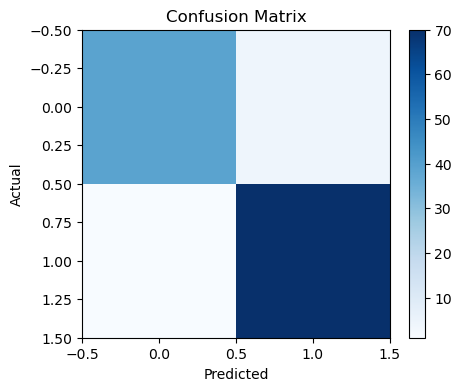


12. Precision, Recall, F1-Score
Precision: 0.9459459459459459
Recall: 0.9859154929577465
F1 Score: 0.9655172413793103

13. Logistic Regression on Imbalanced Data with Class Weights
Accuracy: 0.9649122807017544

14. Logistic Regression on Titanic Dataset with Missing Value Handling
Accuracy: 0.8100558659217877

15. Logistic Regression with and without Feature Scaling
Accuracy without scaling: 0.956140350877193
Accuracy with scaling: 0.9736842105263158

16. ROC-AUC Score
ROC-AUC Score: 0.9983622666229939

17. Logistic Regression with C=0.5
Accuracy: 0.9649122807017544

18. Important Features based on Coefficients
mean radius                1.896740
texture error              1.825257
worst radius               0.528701
mean texture               0.183370
compactness error          0.173394
perimeter error            0.110574
concavity error            0.106849
fractal dimension error    0.031797
mean area                 -0.001432
mean fractal dimension    -0.011142
worst area          

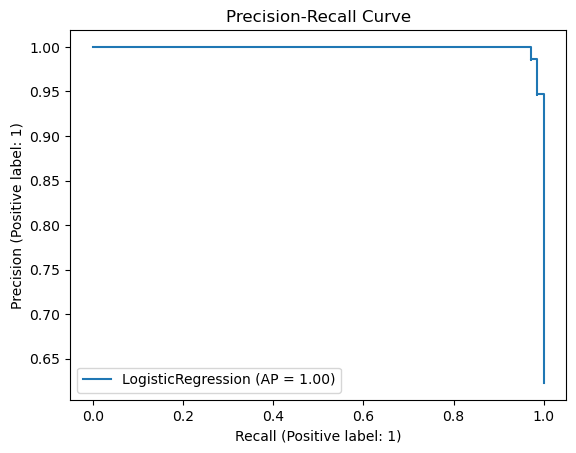


21. Logistic Regression with Different Solvers
Solver: liblinear, Accuracy: 0.956140350877193
Solver: lbfgs, Accuracy: 0.956140350877193
Solver: saga, Accuracy: 0.9649122807017544

22. Matthews Correlation Coefficient
MCC: 0.9068106119605033

23. Compare Accuracy (Raw vs Standardized Data)
Raw Accuracy: 0.956140350877193
Standardized Accuracy: 0.9736842105263158

24. Optimal C using Cross-Validation
C values: [0.01, 0.1, 1, 10, 100]
Cross-Validation Accuracy Scores: [0.9402577239559076, 0.9490451793199813, 0.9508150908244062, 0.9525694767893185, 0.9490762303990063]

25. Save and Load Logistic Regression Model
Loaded Model Accuracy: 0.956140350877193


In [17]:
# Logistic Regression - Theory and Implementation

# -------------------------------------------
# Python Implementations with Output
# -------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

# -------------------------------------------
# 9. Hyperparameter Tuning using RandomizedSearchCV
# -------------------------------------------
print("\n9. Hyperparameter Tuning using RandomizedSearchCV")
param_dist = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
random_search = RandomizedSearchCV(LogisticRegression(max_iter=1000), param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

# -------------------------------------------
# 10. One-vs-One Multiclass Logistic Regression
# -------------------------------------------
print("\n10. One-vs-One (OvO) Multiclass Logistic Regression")
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo_model.fit(X_train_iris, y_train_iris)
y_pred_ovo = ovo_model.predict(X_test_iris)
print("Accuracy:", accuracy_score(y_test_iris, y_pred_ovo))

# -------------------------------------------
# 11. Confusion Matrix Visualization
# -------------------------------------------
print("\n11. Confusion Matrix Visualization")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(5,4))
plt.title("Confusion Matrix")
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------------------
# 12. Precision, Recall, F1-Score Evaluation
# -------------------------------------------
print("\n12. Precision, Recall, F1-Score")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# -------------------------------------------
# 13. Handling Imbalanced Data with Class Weights
# -------------------------------------------
print("\n13. Logistic Regression on Imbalanced Data with Class Weights")
model_imbalance = LogisticRegression(class_weight='balanced', max_iter=1000)
model_imbalance.fit(X_train, y_train)
y_pred_imbalance = model_imbalance.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_imbalance))

# -------------------------------------------
# 14. Titanic Dataset: Handling Missing Values
# -------------------------------------------
print("\n14. Logistic Regression on Titanic Dataset with Missing Value Handling")
titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(titanic_url)
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'
X_titanic = titanic[features]
y_titanic = titanic[target]
imputer = SimpleImputer(strategy='mean')
X_titanic = imputer.fit_transform(X_titanic)
X_train_tt, X_test_tt, y_train_tt, y_test_tt = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)
model_tt = LogisticRegression(max_iter=1000)
model_tt.fit(X_train_tt, y_train_tt)
y_pred_tt = model_tt.predict(X_test_tt)
print("Accuracy:", accuracy_score(y_test_tt, y_pred_tt))

# -------------------------------------------
# 15. Feature Scaling before Logistic Regression
# -------------------------------------------
print("\n15. Logistic Regression with and without Feature Scaling")
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_s, y_train_s)
y_pred_scaled = model_scaled.predict(X_test_s)
acc_scaled = accuracy_score(y_test_s, y_pred_scaled)

print("Accuracy without scaling:", acc_raw)
print("Accuracy with scaling:", acc_scaled)

# -------------------------------------------
# 16. ROC-AUC Score
# -------------------------------------------
print("\n16. ROC-AUC Score")
y_proba = model.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# -------------------------------------------
# 17. Logistic Regression with Custom C
# -------------------------------------------
print("\n17. Logistic Regression with C=0.5")
model_c = LogisticRegression(C=0.5, max_iter=1000)
model_c.fit(X_train, y_train)
y_pred_c = model_c.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_c))

# -------------------------------------------
# 18. Feature Importance using Coefficients
# -------------------------------------------
print("\n18. Important Features based on Coefficients")
coef = model.coef_[0]
important_features = pd.Series(coef, index=data.feature_names).sort_values(ascending=False)
print(important_features)

# -------------------------------------------
# 19. Cohen’s Kappa Score
# -------------------------------------------
print("\n19. Cohen's Kappa Score")
print("Kappa Score:", cohen_kappa_score(y_test, y_pred))

# -------------------------------------------
# 20. Precision-Recall Curve
# -------------------------------------------
print("\n20. Precision-Recall Curve")
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

# -------------------------------------------
# 21. Comparison of Solvers
# -------------------------------------------
print("\n21. Logistic Regression with Different Solvers")
for solver in ['liblinear', 'lbfgs', 'saga']:
    model_solver = LogisticRegression(solver=solver, max_iter=1000)
    model_solver.fit(X_train, y_train)
    acc_solver = accuracy_score(y_test, model_solver.predict(X_test))
    print(f"Solver: {solver}, Accuracy: {acc_solver}")

# -------------------------------------------
# 22. Matthews Correlation Coefficient (MCC)
# -------------------------------------------
print("\n22. Matthews Correlation Coefficient")
print("MCC:", matthews_corrcoef(y_test, y_pred))

# -------------------------------------------
# 23. Compare Raw vs Standardized Data
# -------------------------------------------
print("\n23. Compare Accuracy (Raw vs Standardized Data)")
print("Raw Accuracy:", acc_raw)
print("Standardized Accuracy:", acc_scaled)

# -------------------------------------------
# 24. Optimal C using Cross-Validation
# -------------------------------------------
print("\n24. Optimal C using Cross-Validation")
c_values = [0.01, 0.1, 1, 10, 100]
cv_scores = []
for c in c_values:
    model_cv_c = LogisticRegression(C=c, max_iter=1000)
    scores = []
    for train_idx, test_idx in skf.split(X, y):
        model_cv_c.fit(X[train_idx], y[train_idx])
        y_pred_cv_c = model_cv_c.predict(X[test_idx])
        scores.append(accuracy_score(y[test_idx], y_pred_cv_c))
    cv_scores.append(np.mean(scores))

print("C values:", c_values)
print("Cross-Validation Accuracy Scores:", cv_scores)

# -------------------------------------------
# 25. Save and Load Model using joblib
# -------------------------------------------
print("\n25. Save and Load Logistic Regression Model")
joblib.dump(model, "logistic_model.joblib")
loaded_model = joblib.load("logistic_model.joblib")
y_loaded_pred = loaded_model.predict(X_test)
print("Loaded Model Accuracy:", accuracy_score(y_test, y_loaded_pred))
